In [1]:
from config import *
from matplotlib import pyplot as plt
import torchvision
import torch
import numpy as np
from shared.constants import general_emotion_mapping
from dataloaders.video_custom_dataloader import video_custom_dataloader


In [2]:
custom_dataloader = video_custom_dataloader(csv_file=VIDEO_METADATA_CSV,
                                batch_size=BATCH_SIZE,
                                frames_dir=FRAMES_FILES_DIR,
                                seed=RANDOM_SEED,
                                limit=LIMIT,
                                preload_frames=PRELOAD_FRAMES,
                                apply_transformations=APPLY_TRANSFORMATIONS,
                                balance_dataset=BALANCE_DATASET,
                                normalize=NORMALIZE,
                                )

In [3]:
train_loader = custom_dataloader.get_train_dataloader()
val_loader = custom_dataloader.get_val_dataloader()
test_loader = custom_dataloader.get_test_dataloader()

c:\Users\danil\Documents\Repositories\MI\datasets\video_custom_dataset.py:118: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fillna({"balanced": False}, inplace=True)


--Data Balance-- balance_data set to True. Training data will be balanced.
--Data Balance-- Classes before balancing:  {6: 6257, 4: 6118, 1: 5981, 3: 5790, 2: 5674, 5: 5554, 7: 5395, 0: 2705}
--Data Balance-- The most common class is 6 with 6257 images.
--Data Balance (Oversampling)-- Adding 3552 to 0 class..
--Data Balance (Oversampling)-- Adding 276 to 1 class..
--Data Balance (Oversampling)-- Adding 583 to 2 class..
--Data Balance (Oversampling)-- Adding 467 to 3 class..
--Data Balance (Oversampling)-- Adding 139 to 4 class..
--Data Balance (Oversampling)-- Adding 703 to 5 class..
--Data Balance (Oversampling)-- Adding 862 to 7 class..
--Data Balance-- Classes after balancing:  {0: 6257, 1: 6257, 2: 6257, 3: 6257, 4: 6257, 5: 6257, 6: 6257, 7: 6257}
--Dataset-- Training dataset size: 43474
--Data Preloading-- Preloading frames files.


100%|██████████| 50056/50056 [01:45<00:00, 476.19it/s]


--Data Preloading-- Preloading frames files.


100%|██████████| 4347/4347 [00:05<00:00, 763.20it/s]


--Data Preloading-- Preloading frames files.


100%|██████████| 4361/4361 [00:05<00:00, 780.14it/s]


In [4]:
def plot_image_grid(frames: torch.Tensor, labels: torch.Tensor,title=None):
    # Convert from tensor to image format
    frames = frames.numpy()
    labels = labels.numpy() 

    # Choose 10 random images to display from the batch with their corresponding labels
    mapped_labels = [general_emotion_mapping[label.item()] for label in labels]

    fig, axs = plt.subplots(2, 5, figsize=(20, 10))
    fig.suptitle(title)

    for i in range(2):
        for j in range(5):
            axs[i, j].imshow(frames[5*i+j].transpose(1, 2, 0))
            axs[i, j].set_title(mapped_labels[5*i+j])
            axs[i, j].axis('off')
    plt.show()
    

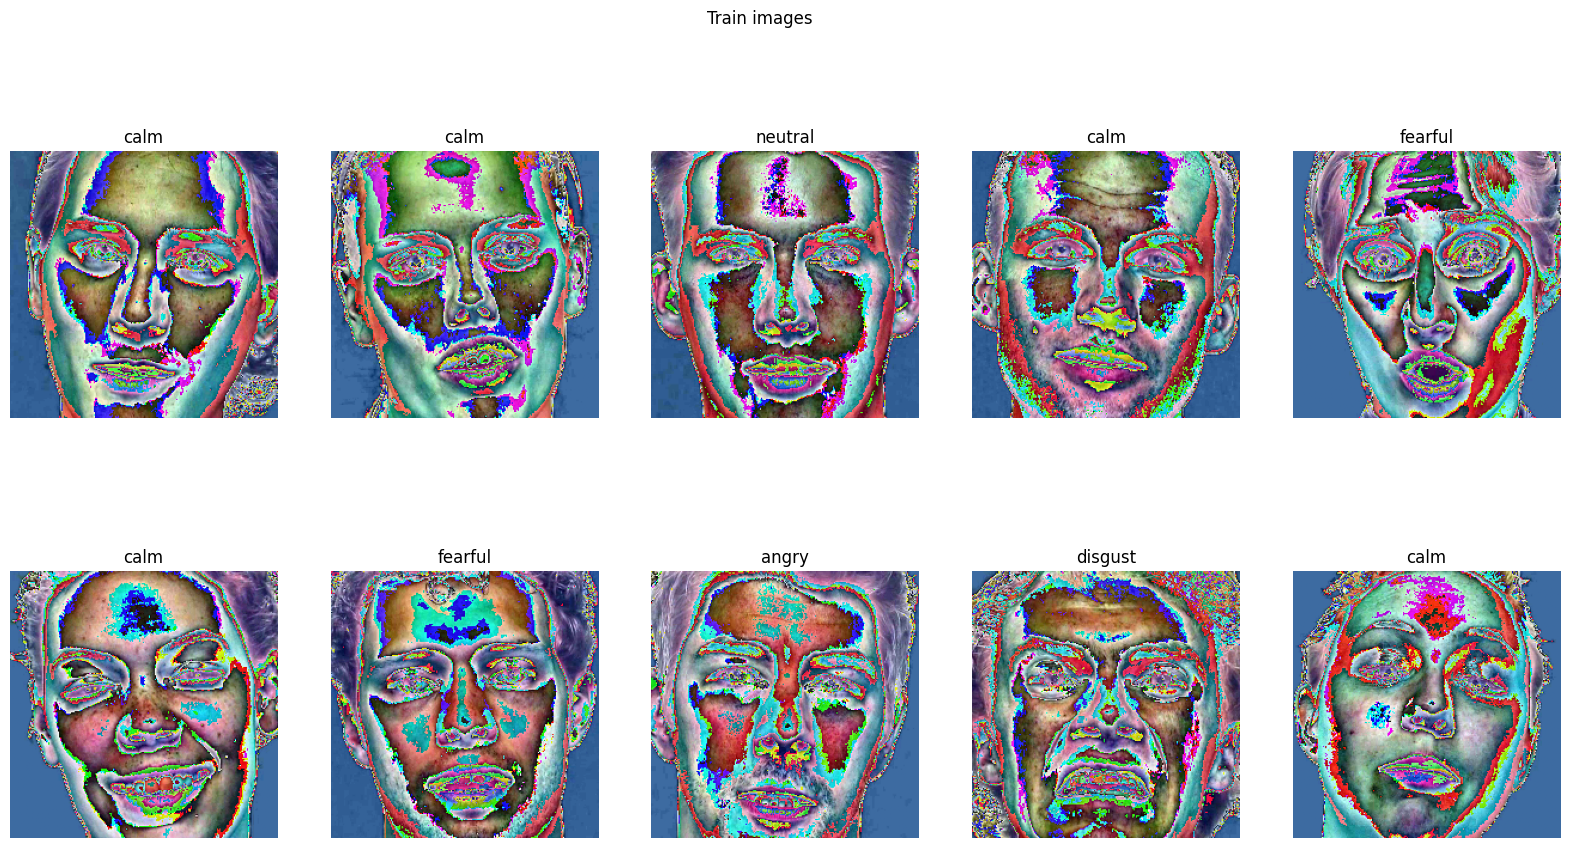

In [8]:
_, batch = next(enumerate(train_loader))
frames, labels = batch['frame'], batch['emotion']
plot_image_grid(frames, labels,"Train images")

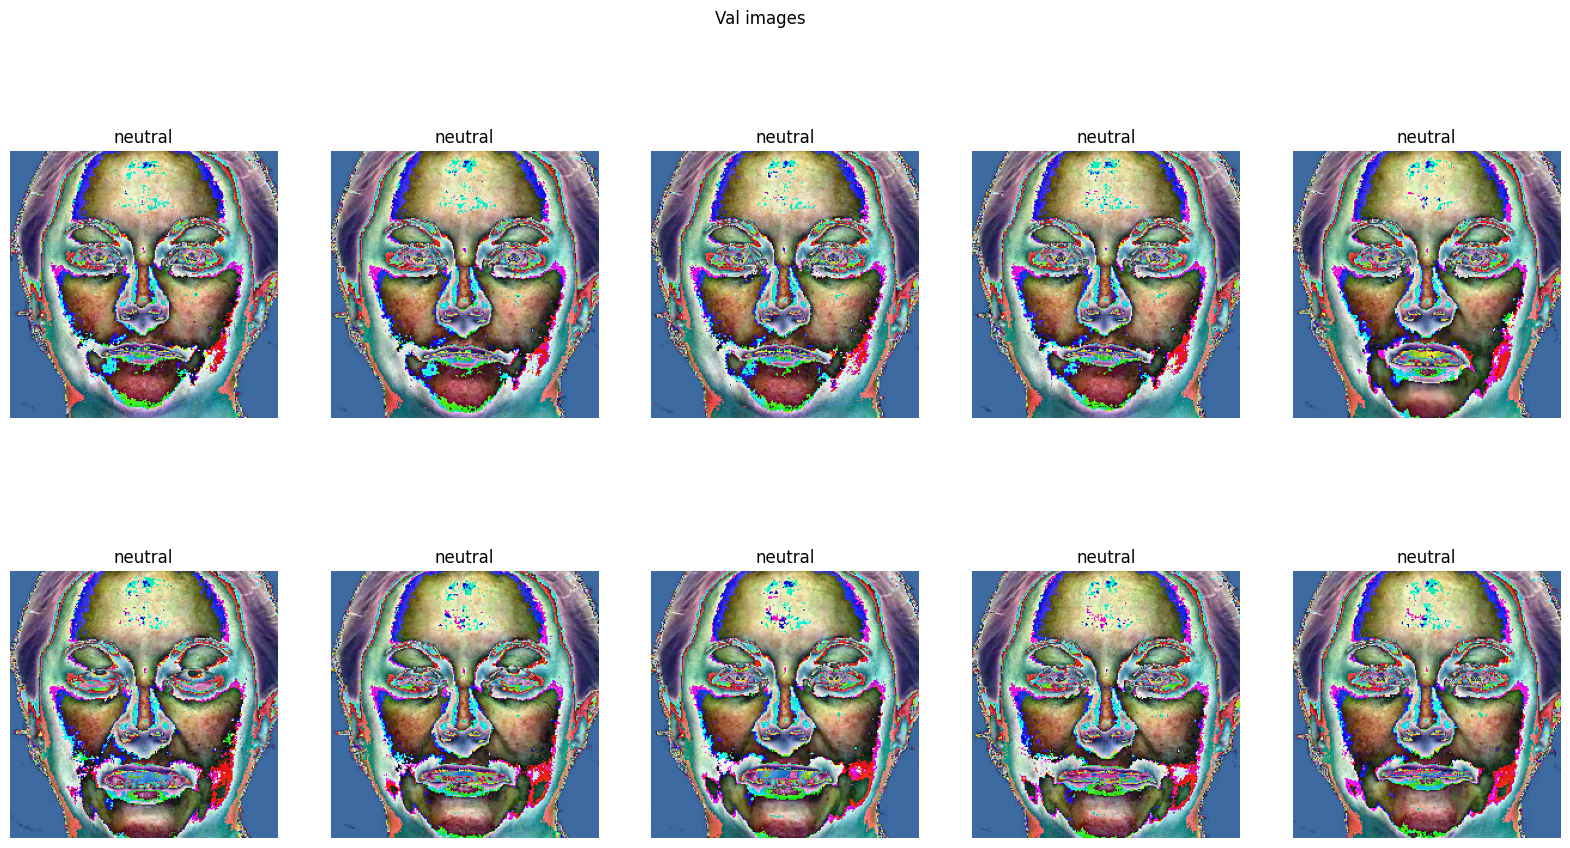

In [9]:
_, batch = next(enumerate(val_loader))
frames, labels = batch['frame'], batch['emotion']
plot_image_grid(frames, labels,"Val images")

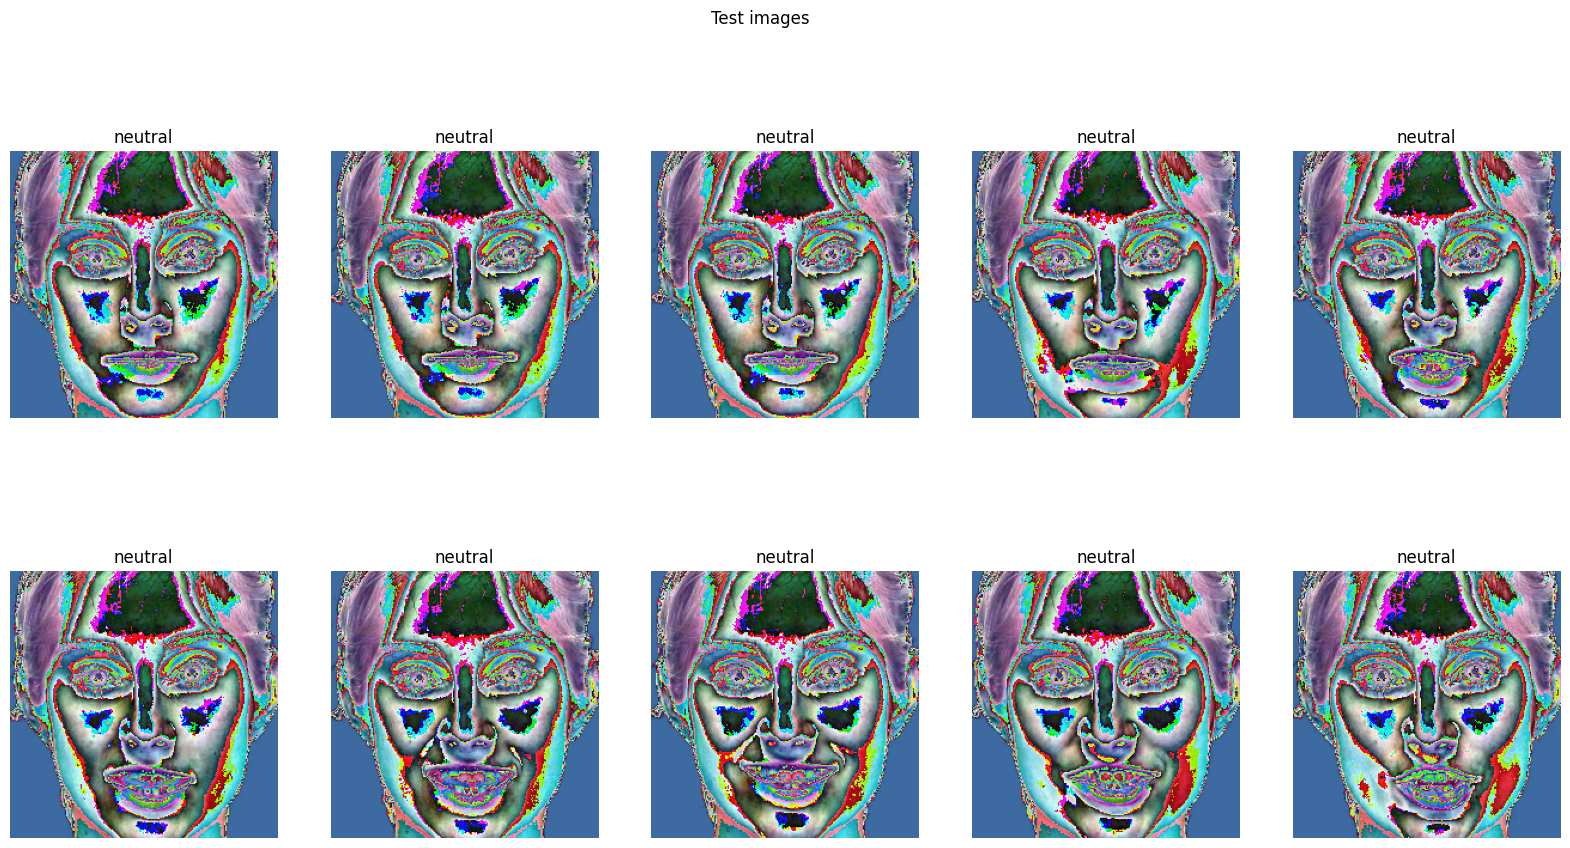

In [11]:
_, batch = next(enumerate(test_loader))
frames, labels = batch['frame'], batch['emotion']
plot_image_grid(frames, labels,"Test images")